In [73]:
from IPython.display import HTML
HTML("<h1>The graph initialisation</h1>")

In [74]:
G = {"cluster1-cntx":["cluster1-cntx","cluster2-cntx"], "cluster2-cntx":["cluster2-cntx","cluster1-cntx"]}#, "cluster3-cntx":["cluster3-cntx"]}
#Change the graph according to the current cluster configurations, so if you remove cluster 3 from the dict value of cluster 1, means that cluster 1 is not connected to 3

#Make sure the latency graph matches the G graph "who can talk to whom? Then what is the latench?
link_latency = {"cluster1-cntx":{"cluster1-cntx":0, "cluster2-cntx":10},"cluster2-cntx":{"cluster2-cntx":0, "cluster1-cntx":10}}

#Change this and initialise to reflect the simulated latency on each cluster-to-cluster link
bf = {"firewall":{"firewalls":10, "firewallm":5, "firewalll":1}, "encrypt":{"encrypts":10, "encryptm":5, "encryptl":1}, "decrypt":{"decrypts":10, "decryptm":5, "decryptl":1}}
#This reflects that the processing power of firewalll is the best in terms of processing delay and the worst with smaller configurations

G_req = {"firewall":["encrypt"], "encrypt":["firewall"]}#, "decrypt":["firewall"]}
#This is the actual request rule that you want to be placed. Change this with each experiment to reflect the rule needed
#MAKE SURE THAT THE REQUEST G_REQ MATCHES THE U VALUE

usecase = {"EHR:1C:E-F-D":{"firewall":30,"encrypt": 20, "decrypt":10, "SLA":100}, "EHR:1C:F-E-D":{"firewall":40, "encrypt": 10, "decrypt": 10, "SLA": 100}, "EHR:1C:E-D":{"encrypt": 20, "decrypt":20, "SLA":100}, "EHR:1C:E-F":{"firewall":30,"encrypt": 20, "SLA":100}, "EHR:1C:E":{"encrypt": 50, "SLA":100}, "EHR:1C:F":{"firewall":20, "SLA":100}, "EHR:10C:E-F-D":{"firewall":130,"encrypt": 80, "decrypt":20, "SLA":100}, "EHR:10C:E":{"encrypt": 80, "SLA":100}, "EHR:10C:F-E-D":{"firewall":160, "encrypt": 20, "decrypt":20, "SLA":100},"EHR:10C:E-D":{"encrypt": 80, "decrypt":80, "SLA":100}, "EHR:10C:E-F":{"firewall":130,"encrypt": 80, "SLA":100}, "EHR:10C:F":{"firewall":100,"SLA":100}, "STREAM:1C:E-F-D":{"firewall":130,"encrypt": 80, "decrypt":25, "SLA":10}, "STREAM:1C:F-E-D":{"firewall":180,"encrypt": 25, "decrypt": 25, "SLA": 10}, "STREAM:1C:E-D":{"encrypt": 80, "decrypt":80, "SLA":10}, "STREAM:1C:E-F":{"firewall":130,"encrypt": 80, "SLA":10}, "STREAM:1C:F":{"firewall":180, "SLA":10}, "STREAM:10C:E-F-D":{"firewall":300,"encrypt": 150, "decrypt":40, "SLA":10}, "STREAM:10C:F-E-D":{"firewall":350, "encrypt": 40, "decrypt":40, "SLA":10},"STREAM:10C:E-D":{"encrypt": 150, "decrypt":150, "SLA":10}, "STREAM:10C:E-F":{"encrypt":300,"firewall": 300, "SLA":10},  "ALGO:1C:E-F-D":{"firewall":30,"encrypt": 20, "decrypt":10, "SLA":100}, "ALGO:1C:F-E-D":{"firewall":40,"encrypt": 10, "decrypt": 10, "SLA": 100}, "ALGO:1C:E-D":{"encrypt": 20, "decrypt":20, "SLA":100}, "ALGO:1C:E-F":{"firewall":30,"encrypt": 20, "SLA":100}, "ALGO:1C:F":{"firewall":40, "SLA":100}, "ALGO:10C:E-F-D":{"firewall":130,"encrypt": 80, "decrypt":20, "SLA":100}, "ALGO:10C:F-E-D":{"firewall":160, "encrypt": 20, "decrypt":20, "SLA":100},"ALGO:10C:E-D":{"encrypt": 80, "decrypt":80, "SLA":100}, "ALGO:10C:E-F":{"firewall":130,"encrypt": 80, "SLA":100}, "ALGO:10C:F":{"firewall":160,"SLA":100}, "EHR:50C:F":{"firewall":270, "SLA":100}, "EHR:50C:E":{"encrypt": 130, "SLA":100},"EHR:20C:F":{"firewall":200, "SLA":100}, "EHR:20C:E":{"encrypt":70, "SLA":100}, "EHR:30C:F":{"firewall":220, "SLA":100}, "EHR:30C:E":{"encrypt":100, "SLA":100}, "EHR:40C:F":{"firewall":250, "SLA":100}, "EHR:40C:E":{"encrypt":120, "SLA":100}, "STREAM:20C:F":{"firewall":750, "SLA":10}, "STREAM:20C:E-F":{"firewall":750, "encrypt":500, "SLA":10},"STREAM:20C:E":{"encrypt":500, "SLA":10}}
#Do not change this, these are the profiled values of CPU average running different use cases and different rules

In [77]:
#To generate different usecases under different requests 

G_req1 = {"encrypt":["firewall"], "firewall":["encrypt", "decrypt"], "decrypt":["firewall"]}
G_req2 = {"firewall":["encrypt"], "encrypt":["firewall", "decrypt"], "decrypt":["encrypt"]}
G_req3 = {"encrypt":["decrypt"], "decrypt":["encrypt"]}
G_req4 = {"encrypt":["firewall"], "firewall":["encrypt"]}
G_req5 = {"firewall":["firewall"]}
G_req6 = {"encrypt":["encrypt"]}

#Specify by initialising G_req = G_reqX
#You also need specify use case by initialising value u as an example, u= "EHR:1C:E-F-D"
#Key values starting with EHR refers to usecase A
#Keys starting with STREAM use case B
#Keys starting with ALGO refers to usecase C
#Keys represeted as "USECASE:NUMBEROFCLIENTS:RULE"
#Make sure while initialising a use case to match it to the requested chain
#Ex: 
u = "EHR:10C:E-F-D"
G_req=G_req1
#We have one proxy so leave this proxy value as it is, unless the proxy service you have has a different name
proxy="proxy1"

In [78]:
from IPython.display import HTML
HTML("<h1>The graph illustration</h1>")

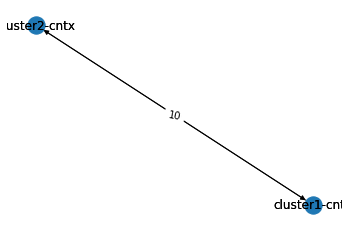

In [79]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab

def draw(G):
    infra = nx.DiGraph()
 #   for cl in range(len(G)):
 #       i = list(G.keys())[cl]
 #       infra.add_node(i)
    for cl in range(len(G)):
        i = list(G.keys())[cl]
        for link in range(len(G[i])):
            infra.add_edges_from([(i, G[i][link])], weight=link_latency[i][G[i][link]])
    edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in infra.edges(data=True)])


    pos = nx.spring_layout(infra)
    nx.draw_networkx_edge_labels(infra,pos,edge_labels=edge_labels)
    nx.draw_networkx_labels(infra, pos)
    #plt.figure(figsize=(8,8))
    
    nx.draw(infra, pos=pos, with_labels=True)
    plt.show()
    

draw(G)

In [80]:
#The number of running pods of a microservice on each cluster
import os
def runningPods(cluster, app_name):
    output = os.popen('sudo kubectl top pod --context=' + cluster).read()
    lines = output.split("\n")
    numPods = 0
    which_app = len(app_name)
    for line in lines[:-1]:
        items = line.split()
        if len(items[0]) > 8 and items[0][:which_app] == app_name:
            numPods += 1
    return numPods
runningPods("cluster1-cntx","firewall"+'s')

0

In [81]:
#The utilised CPU of a microservice running on a cluster
import os
def getchar(string, n):
    return str(string)[n - 1]
def cpuUtilised(cluster, app_name):
    output = os.popen('kubectl top pod --context=' + cluster).read()
    lines = output.split("\n")
    which_app = len(app_name)
    cpu = ''
    cpu_u=0
    limits=0
    for line in lines[:-1]:
        items = line.split()
        if items[0][:which_app] == app_name:
            if getchar(items[0], which_app) == 's':
                cpu = items[1]
                cpu = cpu[:-1]
                cpu = int(cpu)
                cpu_u=cpu_u + cpu
            if getchar(items[0], which_app) == 'm':
                cpu = items[1]
                cpu = cpu[:-1]
                cpu = int(cpu)
                cpu_u=cpu_u + cpu
            if getchar(items[0], which_app) == 'l':
                cpu = items[1]
                cpu = cpu[:-1]
                cpu = int(cpu)
                cpu_u=cpu_u + cpu

        
                
#    print(limits - cpu_u)
    return cpu_u


cpuUtilised("cluster1-cntx","firewall"+'m')

0

In [82]:
#The available CPU of a microservice running on a cluster
import os
def getchar(string, n):
    return str(string)[n - 1]
def cpuAvail(cluster, app_name):
    output = os.popen('kubectl top pod --context=' + cluster).read()
    lines = output.split("\n")
    which_app = len(app_name)
    cpu = ''
    cpu_u=0
    limits=0
    for line in lines[:-1]:
        items = line.split()
        if items[0][:which_app] == app_name:
            if getchar(items[0], which_app) == 's':
                limits = 600
                cpu = items[1]
                cpu = cpu[:-1]
                cpu = int(cpu)
                cpu_u=cpu_u + cpu
            if getchar(items[0], which_app) == 'm':
                limits = 5*600
                cpu = items[1]
                cpu = cpu[:-1]
                cpu = int(cpu)
                cpu_u=cpu_u + cpu
            if getchar(items[0], which_app) == 'l':
                limits = 10*600
                cpu = items[1]
                cpu = cpu[:-1]
                cpu = int(cpu)
                cpu_u=cpu_u + cpu

        
                
#    print(limits - cpu_u)
    return limits - cpu_u


cpuAvail("cluster1-cntx","firewall"+'s')

0

In [83]:
#Which microservice configuration is running: small, medium, or large
def getchar(string, n):
    return str(string)[n - 1]
def whichConf(cluster, app_name):
    size = []
    output = os.popen('sudo kubectl get services --context=' + cluster).read()
    lines = output.split("\n")
    which_app = len(app_name)
    for line in lines[:-1]:
        items = line.split()
        if items[0][:which_app] == app_name:
            size.append(getchar(items[0], which_app+1))
    #        print(size)
    return size
whichConf("cluster1-cntx","firewall")

[]

In [84]:
#This function orders the running microservies on a cluster increasingly according to proccessing delay
def orderService(cluster, app_name):
    delay = []
    size = whichConf(cluster, app_name)
    for s in range(len(size)):
        delay.append(bf[app_name][app_name+size[s]])
    sorted_delay = [x for _,x in sorted(zip(delay,size))]
    return sorted_delay
 #   print(delay)
                
    
orderService("cluster1-cntx","firewall")

[]

In [85]:
import os
def getIP(cluster, app_name):
    output = os.popen('kubectl get service -o wide --context=' + cluster).read()
    lines = output.split("\n")
    serviceIP = ''
    port=''
    which_app = len(app_name)
    for line in lines[:-1]:
        items = line.split()
        if items[0][:which_app] == app_name:
            serviceIP=items[2]+":"+items[4][:4]
    return serviceIP
getIP("cluster1-cntx","firewall"+'m')

''

In [86]:
#This function orders the available links from source cluster increasingly according to latency
def orderlink(cluster):
    delay = []
    cnx = []
    for key in range(len(list(link_latency["cluster1-cntx"].keys()))):
        delay.append(link_latency["cluster1-cntx"][list(link_latency["cluster1-cntx"].keys())[key]])
        cnx.append(list(link_latency["cluster1-cntx"].keys())[key])
    sorted_delay = [x for _,x in sorted(zip(delay,cnx))]
    return sorted_delay
 #   print(delay)
                
    
orderlink("cluster1-cntx")

['cluster1-cntx', 'cluster2-cntx']

In [87]:

#Available CPU on a cluster in millicores
def clusterCPU(cluster):
    cpu=0
    cpu_cl=0
    nodes=0
    output = os.popen('sudo kubectl top nodes --context=' + cluster).read()
    lines = output.split("\n")
    for line in lines[:-1]:
        items = line.split()
        if items[0] != "NAME":
            cpu = items[1]
            cpu = cpu[:-1]
            cpu = int(cpu)
            cpu_cl = cpu_cl + cpu
            nodes=nodes+1
    return nodes*2000 - cpu_cl

clusterCPU('cluster1-cntx')

2842

In [88]:
from IPython.display import HTML
HTML("<h1>Place and Assign new mircroservice to requests</h1>")

In [89]:
#Returns the lists of clusters on which a microservice type is running
def checkdeploy(app_name):
    cl = 0
    p=0
    cluster=[]
    while p == 0:
        for cl in range(len(G)):
            i = list(G.keys())[cl]
            output = os.popen('sudo kubectl get services --context=' +i).read()
            lines = output.split("\n")
            which_app = len(app_name)
            for line in lines[:-1]:
                items = line.split()
                if items[0][:which_app] == app_name:
                    cluster.append(i)
                    p=1
                    
    return cluster
checkdeploy("proxy")
            

['cluster1-cntx', 'cluster1-cntx', 'cluster1-cntx', 'cluster2-cntx']

In [104]:
def assignService(i, q, usecase_s):
#    req = 1
#    cl = 1
    config_idx='' 
    size=[]
    avail=0
    cpu_q= usecase_s[u][q]
    r = runningPods(i, q)
    if r >= 1: #there's a function already running on this cluster 
        size = orderService(i,q) #which function size is running? order by delay
        for s in range(len(size)): 
            avail = cpuAvail(i, q+size[s]) #the available CPU depends on the service configuration
            if avail > cpu_q: #if the available resources > profiled resources requested 
                config_idx = size[s] #then get IP to assign the service to proxy
                break
    elif r ==0 : #no service running 
        config_idx=''          
    #print(proxy_conf)
    return config_idx

def newService(i,q, usecase_s):
    config_idx=''
    cpu_q= usecase_s[u][q]
    r = runningPods(i, q)
    if 100 >= cpu_q and runningPods(i, q+'s') == 0 and 200 < clusterCPU(i): #deploy new small service
        #place(i,q,'s')
        config_idx='s'       
    elif 200 >= cpu_q and runningPods(i, q+'m')==0 and 300 < clusterCPU(i): #deploy new medium service
        config_idx='m'
    elif 500 >= cpu_q and runningPods(i, q+'l')==0 and 600 < clusterCPU(i): #deploy new large service
        config_idx='l'

  #  elif proxy_conf=='':
  #      print("placement failed")
        
    
    #print(proxy_conf)
    return config_idx

In [91]:
from IPython.display import HTML
HTML("<h1>Monitor and delete function</h1>")

In [92]:
#def monitorUsage(t): #This function is terminate services once idle for a time 
import threading
import time
import os

def deletePod(app_name, timer, cluster):
    #print("thread is starting")
    action=[None] * 5
    policy=[]
    cpu = 0
    timeout = time.time() + timer
    while cpu == 0:
        cpu= cpuUtilised(cluster, app_name)
        if time.time() > timeout:
            action[0]=cluster
            action[1]=0
            action[2]= app_name[len(app_name)-1]
            action[3]= app_name[:-1]
            action[4]= 0
            policy.append(action)
            break
    return policy
class ThreadWithResult(threading.Thread):
    def __init__(self, group=None, target=None, name=None, args=(), kwargs={}, *, daemon=None):
        def function():
            self.result = target(*args, **kwargs)
        super().__init__(group=group, target=function, name=name, daemon=daemon)

        
def monitorUsage(cluster, timer):

    for service in range(len(bf)):
        threads = list()
        ser = list(bf.keys())[service]
        s = whichConf(cluster,ser)
        if s != []:
            for size in range(len(s)):
                app_name=ser+s[size]
                x =ThreadWithResult(target=deletePod, args=(app_name, timer, cluster,))
                x.daemon = True
                threads.append(x)
                x.start()
            for x in threads:
                x.join()
                print(x.result)
                

        
#monitorUsage("cluster1-cntx",10)

In [100]:
#With new requests you need to initialise and empty the these values again
#Run this once with every new G_req

m_ser = []
m_cl= ''

In [101]:
def updateAssign(a_ser):
    m_ser.append(a_ser)
    return  m_ser



In [102]:
print(m_cl)

In [103]:
#this feeds the RL agent with heuristic policies 
#[cluster-idx, action-idx, config-idx, app-idx, proxy-idx]

def main():

    proxy_idx=proxy
    action=[None] * 5
    policy=[]
    global m_cl
    global m_ser


    startingCluster = checkdeploy(proxy_idx)
    OG = orderlink(startingCluster) #try the fastest link first
    for cl in range(len(OG)): #go over clusters 
        i = list(G.keys())[cl]
        for req in range(len(G_req)):
            q = list(G_req.keys())[req] #go over functions to deploy
            if q not in m_ser:
                if q == list(G_req.keys())[0]: #The first function can be deployed on any cluster
                    if assignService(i,q, usecase) != "": #there is atleast one good candidate service running on i 
                        action[0]=i
                        action[1]=1
                        action[2]= assignService(i,q, usecase)
                        action[3]= q
                        action[4]= proxy_idx
                        policy.append(action)
                        m_cl= i #to check connection with next deployment
                        #m_serv=m_ser.append(q)
                        updateAssign(q)
                        #print(m_ser)
                        return policy
                elif m_cl in G[i]: #connection with previous bf and not already deployed
                    if assignService(i,q, usecase) != "": #can be deployed
                        action[0]=i
                        action[1]=1
                        action[2]= assignService(i,q, usecase)
                        action[3]= q
                        action[4]= proxy_idx
                        policy.append(action)
                        m_cl= i
                        #m_ser=m_ser.append(q)
                        updateAssign(q)
                        #print(m_ser)
                        return policy
            else: 
                continue
        if len(m_ser) < len(G_req): #not all deployed yet we try a different cluster      
            continue 
        else:
            break
    if len(m_ser) < len(G_req): #not all functions could be deployed 
        for cl in range(len(OG)): #go over clusters 
            i = list(G.keys())[cl]
            for req in range(len(G_req)):
                q = list(G_req.keys())[req] #go over functions to deploy
                if q not in m_ser:
                    if q == list(G_req.keys())[0]:
                        if newService(i,q, usecase) != '':
                            action[0]=i
                            action[1]=2
                            action[2]= newService(i,q, usecase)
                            action[3]= q
                            action[4]= proxy_idx
                            policy.append(action)
                            m_cl= i
                            #m_ser=m_ser.append(q)
                            updateAssign(q)
                            #print(m_ser)
                            return policy
                    elif m_cl in G[i]: #connection with previous bf and not already deployed
                        if newService(i,q, usecase) != '':
                            action[0]=i
                            action[1]=2
                            action[2]= newService(i,q, usecase)
                            action[3]= q
                            action[4]= proxy_idx
                            policy.append(action)
                            m_cl= i
                            #m_ser=m_ser.append(q)
                            updateAssign(q)
                            #print(m_ser)
                            return policy
            if len(m_ser) < len(G_req): #not all deployed yet we try a different cluster      
                continue 
            else:
                break
    #proxyConfig(IPs, proxy)
    #print(IPs)
    #print(m_ser)
    
    
main()

[['cluster1-cntx', 2, 's', 'encrypt', 'proxy1']]

In [23]:
from IPython.display import HTML
HTML("<h1>Deploy and monitor microservices</h1>")

In [24]:
#def deploy(proxy, G_req):
#    for r in range(len(G_req)):
#        main(proxy, G_req)
#        time.sleep(1)

def heuristic():
    threads = list()
    x =ThreadWithResult(target=main, args=("proxy", G_req, ))
    x.daemon = True
    x.start()
    threads.append(x)
    for cl in range(len(G)): #go over clusters 
        i = list(G.keys())[cl]
        x = ThreadWithResult(target=monitorUsage, args=(i,10000, ))
        x.daemon = True
        threads.append(x)
        x.start()
    for x in threads:
        x.join()
        print(x.result)
        
heuristic()

[['cluster1-cntx', 2, 's', 'firewall', 'proxy']]
None
None
